In [9]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from matplotlib import image as pim

24

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 108 152 236


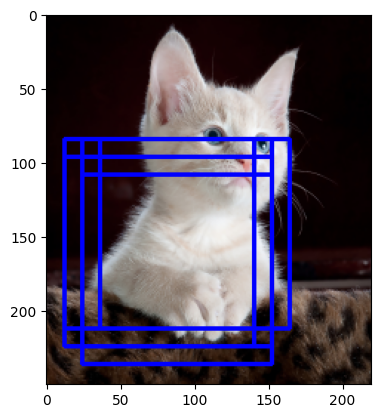

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


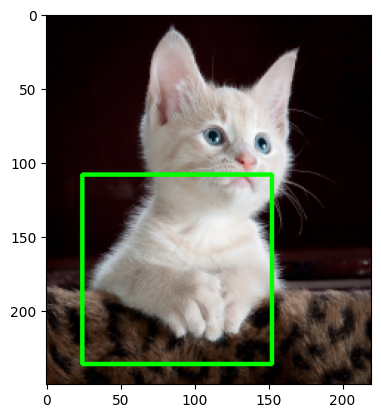

In [25]:
def non_max_suppression(boxes, overlap_thresh):
    # if there are no boxes, return an empty list
    if len(boxes) == 0:
        return []

    # initialize the list of picked indexes
    pick = []
    # grab the coordinates of the bounding boxes
    x1 = boxes[:, 0]
    y1 = boxes[:, 1]
    x2 = boxes[:, 2]
    y2 = boxes[:, 3]
    c = boxes[:, 4]

    # compute the area of the bounding boxes and sort the bounding
    # boxes by the bottom-right y-coordinate of the bounding box
    area = (x2 - x1 + 1) * (y2 - y1 + 1)
    idxs = np.argsort(c)
    # keep looping while some indexes still remain in the indexes
    # list
    while len(idxs) > 0:
        # grab the last index in the indexes list and add the
        # index value to the list of picked indexes
        last = len(idxs) - 1
        i = idxs[last]
        pick.append(i)
        # find the largest (x, y) coordinates for the start of
        # the bounding box and the smallest (x, y) coordinates
        # for the end of the bounding box
        xx1 = np.maximum(x1[i], x1[idxs[:last]])
        yy1 = np.maximum(y1[i], y1[idxs[:last]])
        xx2 = np.minimum(x2[i], x2[idxs[:last]])
        yy2 = np.minimum(y2[i], y2[idxs[:last]])
        # compute the width and height of the bounding box
        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)
        # compute the ratio of overlap
        overlap = (w * h) / area[idxs[:last]]
        # delete all indexes from the index list that have
        idxs = np.delete(
            idxs, np.concatenate(([last], np.nonzero(overlap > overlap_thresh)[0]))
        )
    # return only the bounding boxes that were picked using the
    # integer data type
    return boxes[pick].astype("int")

boundingBoxes = np.array(
    [
        (12, 84, 140, 212, 0.3),
        (24, 84, 152, 212, 0.4),
        (36, 84, 164, 212, 0.5),
        (12, 96, 140, 224, 0.6),
        (24, 96, 152, 224, 0.7),
        (24, 108, 152, 236, 0.8),
    ]
)

# load the image and clone it
image = pim.imread("../../sources/images/nms/cat_nms.png")
orig = image.copy()
# loop over the bounding boxes for each image and draw them
for startX, startY, endX, endY, confidence in boundingBoxes:
    cv2.rectangle(
        orig, (int(startX), int(startY)), (int(endX), int(endY)), (0, 0, 255), 2
    )
# perform non-maximum suppression on the bounding boxes
pick = non_max_suppression(boundingBoxes, 0.3)
# loop over the picked bounding boxes and draw them
for startX, startY, endX, endY, confidence in pick:
    print(startX, startY, endX, endY)
    cv2.rectangle(image, (startX, startY), (endX, endY), (0, 255, 0), 2)

plt.imshow(orig)
plt.show()
plt.imshow(image)
plt.show()